In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import scipy
import re
import pickle
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
sub_name = 'submissions/46feats_svm1.csv'

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_sample_sub = pd.read_csv('data/sampleSubmission.csv')
df_bids = pd.read_csv('data/bids.csv')

In [4]:
feat_list = ['total_bids', 'cond', 'time_std']

In [5]:
#feat_list = ['bid_feats']

In [5]:
feats = [np.load('features/{}.npz'.format(fname))[fname] for fname in feat_list]

In [6]:
for feat in feats:
    print np.sum(np.isnan(feat))

0
0
0


In [7]:
big_x = np.hstack(feats)

In [8]:
big_x.shape

(6614, 46)

In [9]:
#bidder_ids = df_bids['bidder_id'].values.reshape(-1,1)
#l = [list(bidder_id)[0] for bidder_id in bidder_ids]
#ids = np.array(list(set(l)))

In [10]:
ids = df_bids['bidder_id'].unique()

In [11]:
ids.sort()

In [12]:
bids_train_idx = pd.DataFrame(ids).isin(list(df_train['bidder_id'])).values.reshape(-1)

In [13]:
x_train = big_x[bids_train_idx,:]

In [14]:
x_train.shape

(1984, 46)

In [15]:
x_test = big_x[~bids_train_idx,:]

In [16]:
bids_y = pd.DataFrame(ids, columns=['bidder_id']).merge(df_train, on='bidder_id')['outcome'].values

In [17]:
#x_train = np.load('features/bid_feats.npz')['bid_feats'][bids_train_idx,:]

In [18]:
#x_test = np.load('features/bid_feats.npz')['bid_feats'][~bids_train_idx,:]

In [20]:
model = SVC(probability=True)
model = model.fit(x_train, bids_y)

In [21]:
model.score(x_train, bids_y)

0.99647177419354838

In [22]:
bids_test_probs = model.predict_proba(x_test)

In [23]:
submission = pd.DataFrame(np.hstack((ids[~bids_train_idx].reshape(-1,1), bids_test_probs[:,1].reshape(-1,1))), columns=['bidder_id','prediction'])

In [24]:
# add missing bidders
missing_ids = list(set(df_test['bidder_id'])-set(submission['bidder_id']))

missing = pd.DataFrame(np.hstack([np.array(missing_ids).reshape(-1,1), np.zeros((len(missing_ids),1))]),
                       columns=['bidder_id','prediction'])
submission=submission.append(missing)

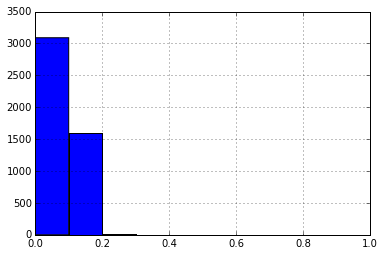

In [25]:
submission['prediction'].astype('float').hist()

In [26]:
submission.to_csv(sub_name, index=False)

In [4]:
# more totals
total_bids = (df_bids.groupby('bidder_id').count()['url'].values.reshape(-1,1))
print total_bids.shape
print np.sum(np.isnan(total_bids))


(6614, 1)
0


In [7]:
df_bids.groupby('bidder_id')

bid_id  auction  merchandise  device    time  country      ip  \
url    country                                                                  
1      0             1        1            1       1       1        0       1   
       1             1        1            1       1       1        1       1   
2      1             2        2            2       2       2        1       2   
       2             2        2            2       2       2        2       2   
3      2             3        3            3       3       3        2       3   
       3             3        3            3       3       3        3       3   
4      1             4        4            4       4       4        1       4   
       3             4        4            4       4       4        3       4   
       4             4        4            4       4       4        4       4   
5      4             5        5            5       5       5        4       5   
       5             5        5            5       5       5        5       5   
6      5             6        6            6       6       6        5       6   
       6             6        6            6       6       6        6       6   
7      5             7        7            7       7       7        5       7   
       6             7        7            7       7       7        6       7   
       7             7        7            7       7       7        7       7   
8      8             8        8            8       8       8        8       8   
9      8             9        9            9       9       9        8       9   
       9             9        9            9       9       9        9       9   
10     10           10       10           10      10      10       10      10   
11     10           11       11           11      11      11       10      11   
       11           11       11           11      11      11       11      11   
12     12           12       12           12      12      12       12      12   
13     12           13       13           13      13      13       12      13   
       13           13       13           13      13      13       13      13   
14     13           14       14           14      14      14       13      14   
       14           14       14           14      14      14       14      14   
15     15           15       15           15      15      15       15      15   
16     16           16       16           16      16      16       16      16   
17     14           17       17           17      17      17       14      17   
...                ...      ...          ...     ...     ...      ...     ...   
42131  42131     42131    42131        42131   42131   42131    42131   42131   
43255  43255     43255    43255        43255   43255   43255    43255   43255   
45265  45265     45265    45265        45265   45265   45265    45265   45265   
46707  46707     46707    46707        46707   46707   46707    46707   46707   
47546  47546     47546    47546        47546   47546   47546    47546   47546   
48018  48018     48018    48018        48018   48018   48018    48018   48018   
51421  51421     51421    51421        51421   51421   51421    51421   51421   
53754  53468     53754    53754        53754   53754   53754    53468   53754   
54987  54987     54987    54987        54987   54987   54987    54987   54987   
57173  57173     57173    57173        57173   57173   57173    57173   57173   
58195  58195     58195    58195        58195   58195   58195    58195   58195   
62529  62529     62529    62529        62529   62529   62529    62529   62529   
62737  61897     62737    62737        62737   62737   62737    61897   62737   
64671  64671     64671    64671        64671   64671   64671    64671   64671   
66027  65639     66027    66027        66027   66027   66027    65639   66027   
71161  71161     71161    71161        71161   71161   71161    71161   71161   
73357  73357     73357    73357        73357   

In [3]:
df_sub = pd.read_csv('submissions/63feats_poly_scale_gb_bag_sigmoid.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa86d41f590>]], dtype=object)

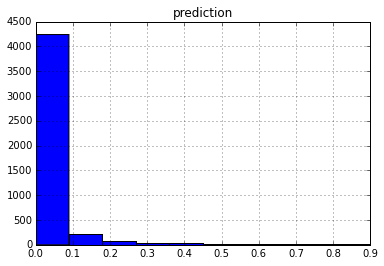

In [4]:
df_sub.hist()

In [37]:
d = genfromtxt('submissions/63feats_poly_scale_gb_bag_sigmoid.csv', delimiter=',')

In [38]:
df_sub = pd.read_csv('submissions/63feats_poly_scale_gb_bag_sigmoid.csv')

In [39]:
df_sub

,bidder_id,prediction
0,002d229ffb247009810828f648afc2ef593rb,0.017512
1,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.014930
2,00486a11dff552c4bd7696265724ff81yeo9v,0.015692
3,0051aef3fdeacdadba664b9b3b07e04e4coc6,0.085154
4,0053b78cde37c4384a20d2da9aa4272aym4pb,0.197741
5,0061edfc5b07ff3d70d693883a38d370oy4fs,0.017622
6,00862324eb508ca5202b6d4e5f1a80fc3t3lp,0.015617
7,009479273c288b1dd096dc3087653499lrx3c,0.031043
8,009cee781e8414f7fb55b2f92157e9dbu0y6o,0.015355
9,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,0.713420


In [12]:
s = s[1:,1]

(array([ 4239.,   214.,    84.,    44.,    40.,    18.,    16.,    19.,
           16.,    10.]),
 array([ 0.        ,  0.08985679,  0.17971358,  0.26957037,  0.35942716,
         0.44928395,  0.53914074,  0.62899753,  0.71885432,  0.80871111,
         0.8985679 ]),
 <a list of 10 Patch objects>)

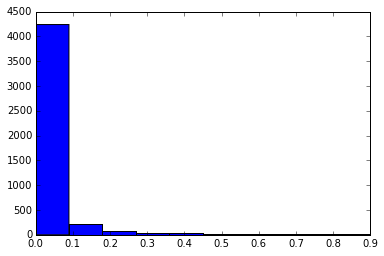

In [13]:
plt.hist(s)

In [16]:
s[s>=0.1 and s<=0.5]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [17]:
np.select([s>=0.1, s<=0.5], s)

ValueError: list of cases must be same length as list of conditions

In [29]:
np.sum(np.logical_and(s>=0.01,s<=0.5))

4560

In [30]:
np.sum(np.logical_and(s>0.5,s<=0.99))

70

In [31]:
len(s)

4700

In [32]:
s[np.logical_and(s>=0.01,s<=0.5)] = 0.01

In [33]:
s[np.logical_and(s>0.5,s<=0.99)] = 0.99

In [35]:
np.sum(np.logical_and(s>0.01,s<=0.5))

0

In [36]:
np.sum(np.logical_and(s>0.5,s<0.99))

0

In [40]:
df_sub['prediction'] = s

In [41]:
df_sub

,bidder_id,prediction
0,002d229ffb247009810828f648afc2ef593rb,0.01
1,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0.01
2,00486a11dff552c4bd7696265724ff81yeo9v,0.01
3,0051aef3fdeacdadba664b9b3b07e04e4coc6,0.01
4,0053b78cde37c4384a20d2da9aa4272aym4pb,0.01
5,0061edfc5b07ff3d70d693883a38d370oy4fs,0.01
6,00862324eb508ca5202b6d4e5f1a80fc3t3lp,0.01
7,009479273c288b1dd096dc3087653499lrx3c,0.01
8,009cee781e8414f7fb55b2f92157e9dbu0y6o,0.01
9,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,0.99


In [42]:
df_sub.to_csv('submissions/63feats_poly_scale_gb_bag_sigmoid_trim.csv', index=False)